# Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,classification_report,auc,roc_curve
from sklearn import preprocessing
#get model duration
import time
from datetime import date

# Data Description

This dataset contains the information on individual attributes such as sex, age, smoking habitsetcetera. It has:

• 1338 rows

• 7 columns

Description of columns:

➢ age – age of primary beneficiary

➢ sex – gender of the beneficiary. It has two categories:

o Male

o Female

➢ bmi – Body Mass Index, providing an understanding of body weights that are relatively
high or low relative to height, objective index of body weight (kg/m^2) using the ratio of
height to weight, ideally 18.5 to 24.9

➢ children – Number of children covered by the health insurance / Number of dependents.

➢ smoker – describing whether a person is a smoker or a non-smoker. It has 2 values:

o Yes

o No

➢ region – the beneficiary’s residential area in the US. It has 4 region values:

o Northeast

o Southeast

o Southwest

o Northwest

➢ charges – Individual insurance premiums billed by health insurance

# Load the data

In [2]:
df = pd.read_csv('G:\Machine Learning\Internship_Project\Insurance_Premium _Prediction\Training_FileFromDB\InputFile.csv')

# Feature Engineering

# 1. Exploratory Data Analysis

In [3]:
df.shape

(1337, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121481
std,14.044333,6.100468,1.205571,12110.359655
min,18.000000,15.960000,0.000000,1121.873901
25%,27.000000,26.290001,0.000000,4746.344238
50%,39.000000,30.400000,1.000000,9386.161133
75%,51.000000,34.700001,2.000000,16657.716797
max,64.000000,53.130001,5.000000,63770.429688


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,23,female,23.180000,2,no,northwest,14426.074219
1,23,female,24.225000,2,no,northeast,22395.744141
2,23,female,28.000000,0,no,southwest,13126.677734
3,23,female,28.120001,0,no,northwest,2690.113770
4,23,female,28.309999,0,yes,northwest,18033.968750


In [6]:
df['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


From above we can see that [age,children,bmi,charges] are numerical features and [sex,smoker,region] are categorical features

In [8]:
all_columns         = list(df)
numeric_columns     = ['age', 'bmi', 'children', 'charges']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'charges']

Categorical columns
['sex', 'smoker', 'region']


# Verifying Missing values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We dont have any missing values present inside the data

# Visualization of columns

Text(0.5, 0.98, 'Corelation between charges and age/bmi')

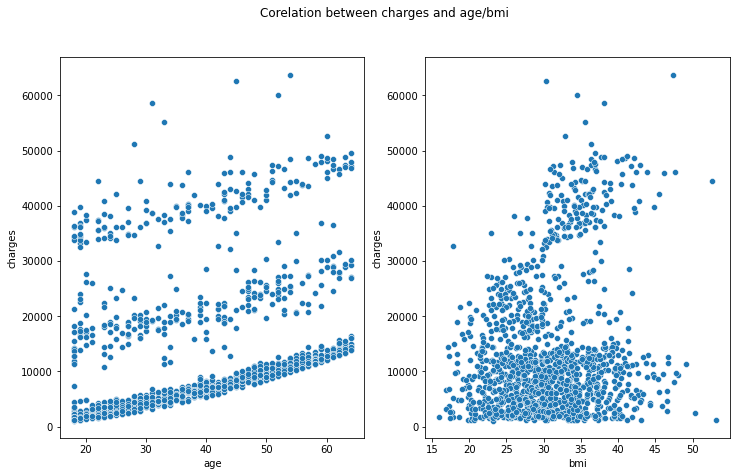

In [10]:
fig,ax = plt.subplots(1,2,figsize=(12,7))
sns.scatterplot(x='age',y='charges',data=df,ax=ax[0])
sns.scatterplot(x='bmi',y='charges',data=df,ax=ax[1])
fig.suptitle('Corelation between charges and age/bmi')

For age the relation is almost linear as the charges increase with the increase in age of the person

However BMI the relationship does not seems linear. Neverthenless, charges increase with increase in persons BMI

Text(0.5, 0.98, 'Corelation between charges and age/bmi on smoker')

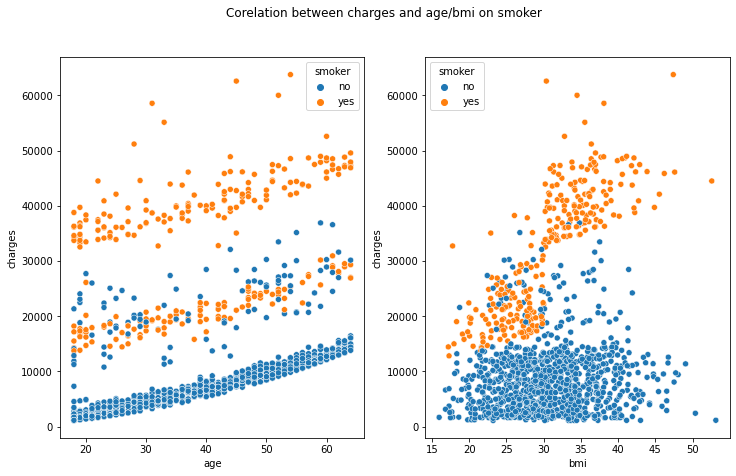

In [11]:
fig,ax = plt.subplots(1,2,figsize=(12,7))
sns.scatterplot(x='age',y='charges',hue='smoker',data=df,ax=ax[0])
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df,ax=ax[1])
fig.suptitle('Corelation between charges and age/bmi on smoker')

Even for the same age group, charges are higher for a person who smokes than a non-smoker as shown by the blue(person who smokes) dots.

People who are obese and smoke tend to have higher charges

Text(0.5, 0.98, 'Corelation between charges and sex/children')

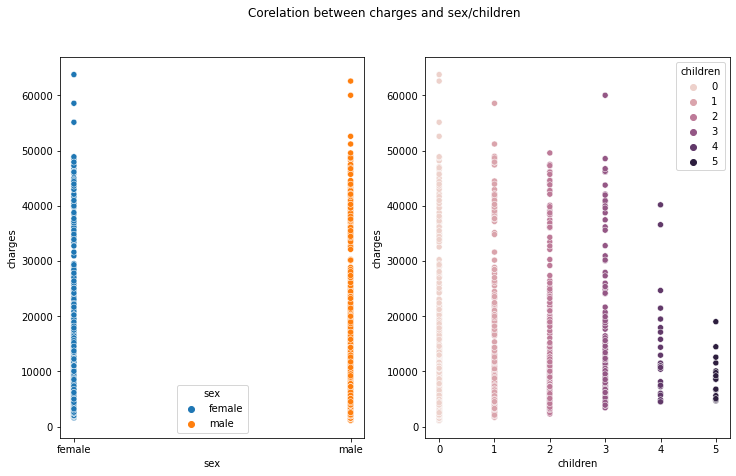

In [12]:
fig,ax = plt.subplots(1,2,figsize=(12,7))
sns.scatterplot(x='sex',y='charges',hue='sex',data=df,ax=ax[0],)
sns.scatterplot(x='children',y='charges',hue='children',data=df,ax=ax[1])
fig.suptitle('Corelation between charges and sex/children')

<AxesSubplot:xlabel='children', ylabel='charges'>

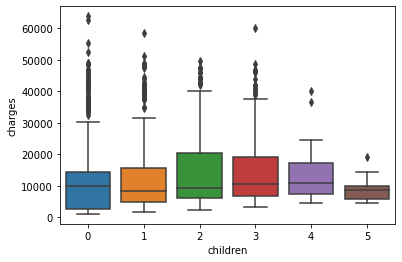

In [13]:
sns.boxplot(x='children',y='charges',data=df)

The above figure indicates that there is no significant relation ship exists between gender and charges.

It can also be seen that people with 2 childrens will have more medical expenses

Text(0.5, 0.98, 'Corelation between charges and smoker/region')

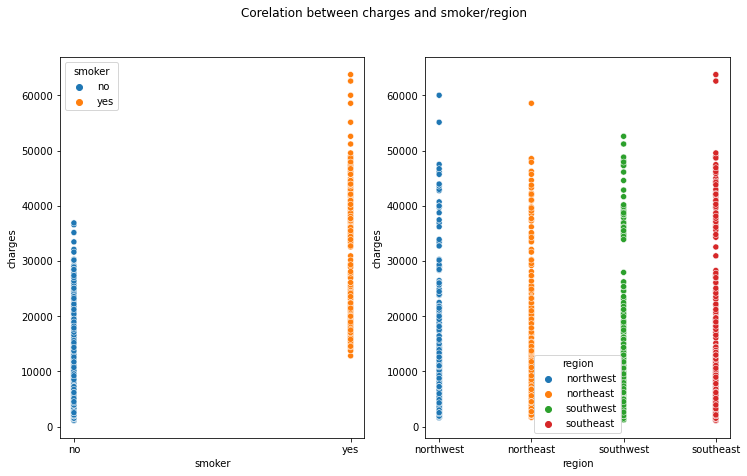

In [14]:
fig,ax = plt.subplots(1,2,figsize=(12,7))
sns.scatterplot(x='smoker',y='charges',hue='smoker',data=df,ax=ax[0],)
sns.scatterplot(x='region',y='charges',hue='region',data=df,ax=ax[1])
fig.suptitle('Corelation between charges and smoker/region')

The above figure describes that charges are signifcantly higher for smokers as compared to non-smokers

Also we can see that region does not have any relationship with the charges people living in different arreas have almost no difference in the charges

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

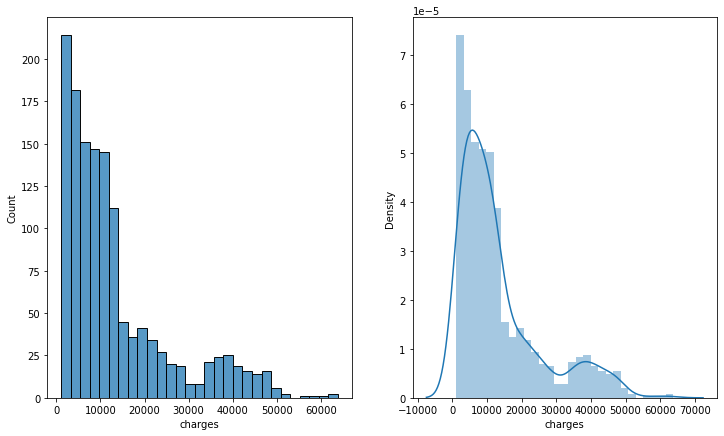

In [15]:
fig,ax = plt.subplots(1,2,figsize=(12,7))
sns.histplot(df['charges'],ax=ax[0])
sns.distplot(df['charges'],ax=ax[1])

There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually!

We need to normalize either by log normal or scaling charges for better prediction

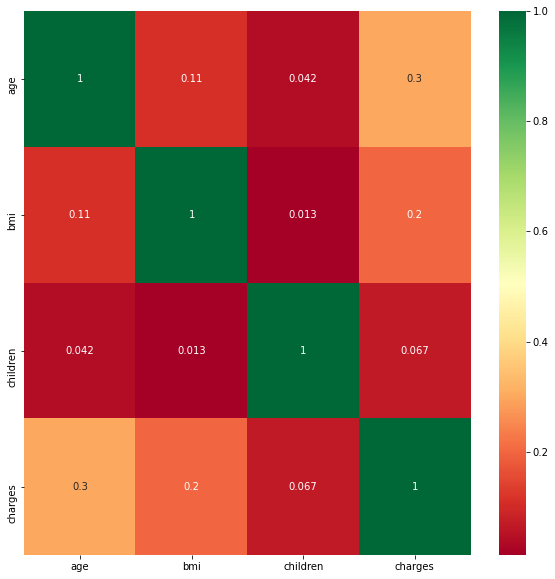

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")
plt.show()

In [17]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The same information can be gathered from this profile report as well:

1. Age, smoker and BMI are the features that have good relationship with the charges which is alsoactually true in real world as :
    * Age - More or less age can have an impact on health that might led to variation of premium charges
    
    *Smoker - Usually smokers have bad health than non smokes and though theri premium charges can vary.
    
    *BMI - Obesity can lead to many health issues which again may impact premium charges.
2. We don't have any null values
3. Data have one duplicate row


# Encoding Categorical Features(sex,smoker,region)

In [31]:
for i in categorical_columns:
    print(i,':')
    print(df[i].value_counts())

sex :
1    675
0    662
Name: sex, dtype: int64
smoker :
0    1063
1     274
Name: smoker, dtype: int64
region :
2    364
3    325
0    324
1    324
Name: region, dtype: int64


In [32]:
for col in df.columns:
#    x=cat_df[col].head(1)
#    cat_df=pd.get_dummies(cat_df,columns=[col],prefix=[col],drop_first=True)
    if (df[col].dtype == 'object'):
        le = preprocessing.LabelEncoder()
        le = le.fit(df[col])
        df[col] = le.transform(df[col])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,23,0,23.180000,2,0,1,14426.074219
1,23,0,24.225000,2,0,0,22395.744141
2,23,0,28.000000,0,0,3,13126.677734
3,23,0,28.120001,0,0,1,2690.113770
4,23,0,28.309999,0,1,1,18033.968750


# sex :

male      676    sex = 1 is male.

female    662    sex = 0 is female.

# smoker :

no     1064       smoker = 0 means no (not a smoker)

yes     274       smoker = 1 means yes (a smoker)

# region :

southeast    364          0100 - southeast  

northwest    325          1000 - northwest

southwest    325          0010 - southwest 

northeast    324          0001 - northeast

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

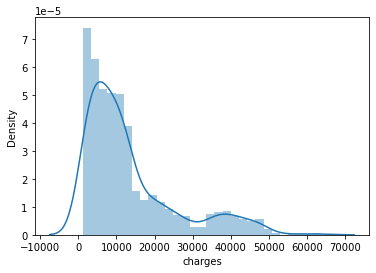

In [33]:
sns.distplot(df['charges'])

In [34]:
from scipy.stats import kurtosis, skew, stats
print("Summary Statistics of Medical Costs")
print(df['charges'].describe())
print("skew:  {}".format(skew(df['charges'])))
print("kurtosis:  {}".format(kurtosis(df['charges'])))
print("missing charges values: {}".format(df['charges'].isnull().sum()))
print("missing smoker values: {}".format(df['charges'].isnull().sum()))

Summary Statistics of Medical Costs
count     1337.000000
mean     13279.121481
std      12110.359655
min       1121.873901
25%       4746.344238
50%       9386.161133
75%      16657.716797
max      63770.429688
Name: charges, dtype: float64
skew:  1.5136902516839563
kurtosis:  1.5937433917780766
missing charges values: 0
missing smoker values: 0


# Verifying Outliers

In [35]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

In [36]:
x=df[numeric_columns]
outlier_detect(x)


 Outliers for Column :  age  Outliers count  0
[]

 Outliers for Column :  bmi  Outliers count  9
[50.380001068115234, 48.06999969482422, 47.7400016784668, 53.130001068115234, 47.52000045776367, 52.58000183105469, 47.40999984741211, 49.060001373291016, 47.59999847412109]

 Outliers for Column :  children  Outliers count  0
[]

 Outliers for Column :  charges  Outliers count  139
[36021.01171875, 38511.62890625, 40904.19921875, 36189.1015625, 46661.44140625, 43254.41796875, 35160.1328125, 44423.8046875, 42303.69140625, 37079.37109375, 55135.40234375, 38282.75, 34672.1484375, 51194.55859375, 43896.375, 38245.59375, 41097.16015625, 41919.09765625, 42856.83984375, 39727.61328125, 45008.95703125, 46130.52734375, 52590.828125, 48173.359375, 48673.55859375, 47305.3046875, 48824.44921875, 47055.53125, 40932.4296875, 36837.46875, 36950.2578125, 39241.44140625, 36898.734375, 36397.57421875, 34779.61328125, 34828.65234375, 36219.40625, 39722.74609375, 36580.28125, 48517.5625, 46599.109375, 47403

We didn't observe any much outliers in our features, There might be few outliers in Charges which can be observe from distribution plot as well as skewness is high but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually!

# Feature scaling

In [37]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121481
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359655
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873901
25%,27.000000,0.000000,26.290001,0.000000,0.000000,1.000000,4746.344238
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161133
75%,51.000000,1.000000,34.700001,2.000000,0.000000,2.000000,16657.716797
max,64.000000,1.000000,53.130001,5.000000,1.000000,3.000000,63770.429688


In [38]:
df['region'].value_counts()

2    364
3    325
0    324
1    324
Name: region, dtype: int64

In [39]:
#splitting data into dependent and independent variable
df_x = df.drop(['charges'],axis=1)
df_y = df['charges']

In [40]:
df_x.head()

,age,sex,bmi,children,smoker,region
0,23,0,23.180000,2,0,1
1,23,0,24.225000,2,0,0
2,23,0,28.000000,0,0,3
3,23,0,28.120001,0,0,1
4,23,0,28.309999,0,1,1


In [41]:
#standard scaler----Feature scaling for numerical columns or that needs normalization or scaling
sc=StandardScaler()
sc.fit(df_x)
scaled = sc.transform(df_x)

In [44]:
df_x_scaled  = pd.DataFrame(data=scaled,columns=df_x.columns)
df_x_scaled

,age,sex,bmi,children,smoker,region
0,-1.155499,-1.009771,-1.227160,0.750351,-0.507702,-0.467128
1,-1.155499,-1.009771,-1.055798,0.750351,-0.507702,-1.372274
2,-1.155499,-1.009771,-0.436761,-0.909234,-0.507702,1.343163
3,-1.155499,-1.009771,-0.417083,-0.909234,-0.507702,-0.467128
4,-1.155499,-1.009771,-0.385927,-0.909234,1.969660,-0.467128
...,...,...,...,...,...,...
1332,-0.371972,0.990324,0.581574,-0.909234,-0.507702,0.438017
1333,-0.371972,0.990324,0.657826,-0.909234,-0.507702,-1.372274
1334,-0.371972,0.990324,0.844767,-0.909234,-0.507702,-0.467128
1335,-0.371972,0.990324,1.880321,0.750351,-0.507702,0.438017


<AxesSubplot:>

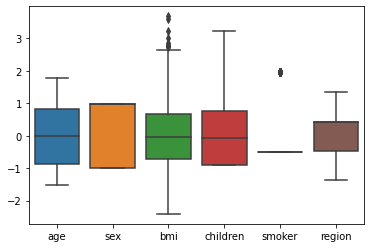

In [45]:
sns.boxplot(data=df_x_scaled)

# Feature Selection

# 1.check for multicollinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
arr=np.array(df_x_scaled)
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif['features'] = df_x_scaled.columns
vif

,vif,features
0,1.015323,age
1,1.008923,sex
2,1.040634,bmi
3,1.002412,children
4,1.006557,smoker
5,1.025976,region


As VIF of all the columns are < 10 hence no need to skip any column due to multicollinearity of indpendent features

# 2.Statastical modelling

This is used for feature selection as we want to find out if the columns/features do indeed affect the medical expenses.

So, if a column shows p-value <=0.05 then we reject the null hypothesis and say that ‘Column/Feature affects medical expenses.

Mostly R-squared remains the same but Adj. R-squared increased. That is because, Adj.R-squared takes the number of columns

into consideration, whereas R-squared does not. So it’s always good to look at Adj. R-squared while removing/adding columns. 

This is known as Backward elimation method

In [47]:
import statsmodels.api as sm
##OrdinaryLeastSquares
df_x_stats = sm.add_constant(df_x_scaled)
regressorOLS = sm.OLS(endog = df_y, exog = df_x_stats).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.0
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:30:00   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.328e+04    165.784     80.099      0.000     1.3e+04    1.36e+04
age         3610.8962    167.049     21.616      0.000    3283.188    3938.605
sex          -64.6974    166.522     -0.389      0.698    -391.371     261.976
bmi         2028.2308    169.118     11.993      0.000    1696.463    2359.999
children     576.9775    165.984      3.476      0.001     251.359     902.596
smoker      9614.7228    166.326     57.806      0.000    9288.432    9941.013
region      -391.1081    167.923     -2.329      0.020    -720.531     -61.685
==============================================================================
Omnibus:                      298.466   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.712
Skew:                           1.206   Prob(JB):                    2.84e-155
Kurtosis:                       5.637   Cond. No.                         1.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Here we can see that sex_male has higher p value which which very much greater than 0.05 . 

Hence this column will definetly be removed

R-squared:	0.751
    
Adj. R-squared:	0.749

In [48]:
df_x_scaled.drop(columns='sex',axis=1,inplace=True)#Droping Sex male column

In [49]:
df_x_stats = sm.add_constant(df_x_scaled)
regressorOLS = sm.OLS(endog = df_y, exog = df_x_stats).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     800.9
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:30:00   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1331   BIC:                         2.712e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.328e+04    165.731     80.125      0.000     1.3e+04    1.36e+04
age         3612.4464    166.948     21.638      0.000    3284.936    3939.957
bmi         2025.0634    168.868     11.992      0.000    1693.787    2356.340
children     575.8317    165.904      3.471      0.001     250.369     901.294
smoker      9609.8276    165.796     57.962      0.000    9284.579    9935.077
region      -390.9238    167.869     -2.329      0.020    -720.240     -61.607
==============================================================================
Omnibus:                      298.834   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.342
Skew:                           1.207   Prob(JB):                    1.26e-155
Kurtosis:                       5.641   Cond. No.                         1.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Before Adj. R-squared:	0.751
    
New Adj. R-squared:	0.750(increased)

Also we can see that no other column has p values greater than 0.05 hence we are good

In [50]:
df_x_scaled.head()

,age,bmi,children,smoker,region
0,-1.155499,-1.227160,0.750351,-0.507702,-0.467128
1,-1.155499,-1.055798,0.750351,-0.507702,-1.372274
2,-1.155499,-0.436761,-0.909234,-0.507702,1.343163
3,-1.155499,-0.417083,-0.909234,-0.507702,-0.467128
4,-1.155499,-0.385927,-0.909234,1.969660,-0.467128


# Predictive Buliding Model

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df_x_scaled,df_y,test_size=0.20,random_state = 100)

# 1.Linear regression Model

In [63]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

start_time = time.time()

# fit linear model to the train set data
linReg_model = linReg.fit(x_train, y_train)

today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.05185985565185547 seconds ---


In [64]:
linReg.coef_

array([3581.40092158, 1949.30061927,  729.59916709, 9422.16912347,
       -381.9159629 ])

In [65]:
linReg.intercept_

13273.308046161015

In [66]:
cols = df_x_scaled.columns
coeff_df_x = pd.DataFrame(linReg.coef_,cols,columns=['Coefficient'])
coeff_df_x

,Coefficient
age,3581.400922
bmi,1949.300619
children,729.599167
smoker,9422.169123
region,-381.915963


# From above we can observe that smoker, age and BMI have the highest effect on the insurance claim charges which is also true in real world

In [67]:
y_pred_train = linReg.predict(x_train)
y_pred = linReg.predict(x_test)
diff = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
diff1 = diff.head(20)
diff1

,Actual,Predict
12,3500.612305,7482.626534
306,17468.984375,25435.808251
318,1748.774048,2869.510001
815,7228.215820,6618.505113
157,22144.031250,31151.994144
244,14451.834961,11993.687791
642,32108.662109,10483.266392
968,3471.409668,8302.338232
142,7640.309082,9200.171163
1033,43813.867188,36852.125440


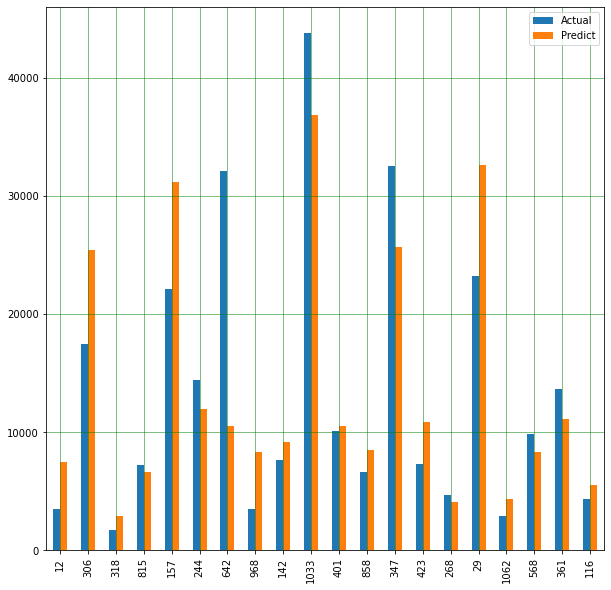

In [68]:
#Plotting Actual and predicted
diff1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [69]:
def calculate_accuracy(actual, predicted):
    SST = 0
    SSR = 0
    SSE = 0
    RMSE = 0
    RSqr = 0
    MAE = 0
    MAPE = 0
    SST = sum((actual - np.mean(predicted))**2)    # Calculate the SST
    SSR = sum((predicted - np.mean(predicted))**2) # Calculate the SSR
    SSE = sum((actual - predicted)**2)             # Calculate the SSE
    RMSE = np.sqrt((sum((predicted - actual)**2))/len(predicted))  # Calculate the RMSE
    RSqr = 1 - (SSE/SST)                           # Calcualte the R_square
    return RMSE, RSqr

In [70]:
#Find MAE, MSE, RMSE and accuracies(r2 score, adj_r2)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 score:',metrics.r2_score(y_test,y_pred))
print('Coefficient: ',linReg.coef_)
print('Intercept: ',linReg.intercept_)
def adj_r2(x,y):
    r2 = linReg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return 'adjusted r2:',adjusted_r2
adj_r2(x_test,y_test)

Mean Absolute Error: 4237.68404643089
Mean Square Error: 38332072.53046596
Root Mean Square Error: 6191.2900538147915
r2 score: 0.7738775165508802
Coefficient:  [3581.40092158 1949.30061927  729.59916709 9422.16912347 -381.9159629 ]
Intercept:  13273.308046161015


('adjusted r2:', 0.7695622019812405)

In [73]:
# calculate the accuracies
r2_score_linear_reg_train = linReg.score(x_train,y_train)

r2_score_linear_reg_test = metrics.r2_score(y_test,y_pred)

rmse_linear = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2_score (train) :',r2_score_linear_reg_train)
print('R2_score (test) :',r2_score_linear_reg_test)
print('RMSE :',rmse_linear)

R2_score (train) : 0.7427715101288761
R2_score (test) : 0.7738775165508802
RMSE : 6191.2900538147915


G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

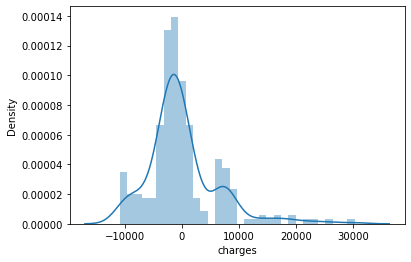

In [74]:
sns.distplot(y_test-y_pred)

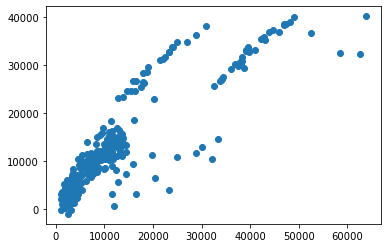

In [75]:
plt.scatter(y_test,y_pred)

In [76]:
#We will use L1 and L2 regularization

In [171]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV,LinearRegression
lassocv = LassoCV(alphas=None,cv=200,max_iter=200000,normalize=True,random_state=500)
lassocv.fit(x_train,y_train)

LassoCV(cv=200, max_iter=200000, normalize=True, random_state=500)

In [172]:
lassocv.alpha_

0.28391093040153714

In [173]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.28391093040153714)

In [174]:
lasso_pred = lasso.predict(x_test)

In [175]:
r2_score_lasso_reg_train = lasso.score(x_train,y_train)

r2_score_lasso_reg_test = metrics.r2_score(y_test,lasso_pred)

rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test,lasso_pred))

print('R2_score (train) :',r2_score_lasso_reg_train)
print('R2_score (test) :',r2_score_lasso_reg_test)
print('RMSE :',rmse_lasso)

R2_score (train) : 0.7427715072182128
R2_score (test) : 0.7738750021843772
RMSE : 6191.324475710416


In [202]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([6.54459667, 9.73260696, 7.85905768, 8.27620247, 1.97480709,
       5.50126717, 4.01494045, 6.19632092, 3.42046703, 5.76524784,
       2.93111237, 3.05489535, 7.14847605, 9.52772535, 9.65971738,
       3.76192543, 2.15003796, 6.31380367, 3.55058864, 9.07613666,
       4.22771273, 7.62010483, 0.13099364, 0.36208278, 1.75878909,
       6.20951334, 9.84730324, 4.86795008, 2.92092837, 9.72922904,
       9.15175705, 7.78514236, 4.29018599, 6.40781974, 3.49212057,
       6.92475553, 1.57023952, 1.86303188, 4.12830004, 2.57246535,
       3.92585618, 7.40727828, 8.47800709, 6.01565156, 1.00910791,
       5.43976934, 2.11705013, 3.31909496, 0.88674859, 6.23829864]),
        cv=10, normalize=True)

In [203]:
ridgecv.alpha_

0.13099363546313358

In [204]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(x_train,y_train)

Ridge(alpha=0.13099363546313358)

In [205]:
ridge_pred = ridge.predict(x_test)

In [206]:
r2_score_ridge_reg_train = ridge.score(x_train,y_train)

r2_score_ridge_reg_test = metrics.r2_score(y_test,ridge_pred)

rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test,ridge_pred))

print('R2_score (train) :',r2_score_ridge_reg_train)
print('R2_score (test) :',r2_score_ridge_reg_test)
print('RMSE :',rmse_lasso)

R2_score (train) : 0.7427714986211232
R2_score (test) : 0.7738634095028192
RMSE : 6191.324475710416


# Linear Regression, Ridge and Lasso all has almost same accuracy

In [565]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(df_x_scaled,df_y)

ExtraTreesRegressor()

In [566]:
print(selection.feature_importances_)

[0.12930387 0.20179812 0.02511846 0.62056639 0.02321315]


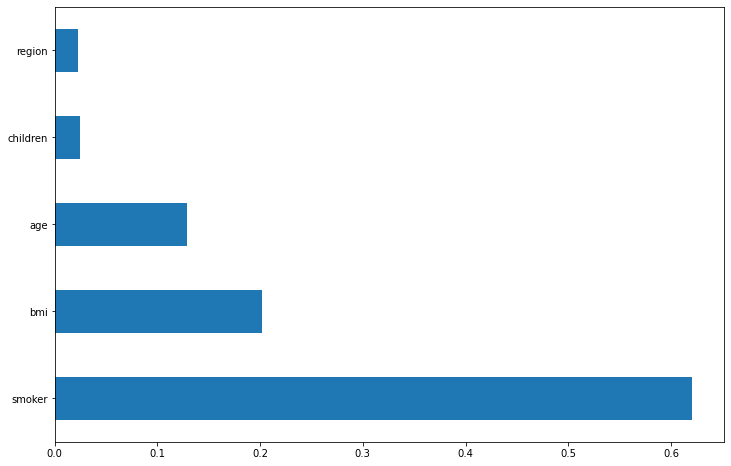

In [567]:
#plot the graph for feature importance for better visualization
plt.figure(figsize=(12,8))
feature_importance = pd.Series(selection.feature_importances_,index=df_x_scaled.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()  

# 2. Decision Tree

In [207]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [208]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [209]:
dt_pred = dt.predict(x_test)

In [210]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('r2 score test:',metrics.r2_score(y_test,dt_pred))
print('r2 score train:',dt.score(x_train,y_train))

MAE: 3338.2381309395405
MSE: 46398585.18286668
RMSE: 6811.650694425447
r2 score test: 0.726292824325202
r2 score train: 0.9982618059636928


In [211]:
r2_score_dt_train = dt.score(x_train,y_train)

r2_score_dt_test = metrics.r2_score(y_test,dt_pred)

rmse_dt = np.sqrt(metrics.mean_squared_error(y_test,dt_pred))

print('R2_score (train) :',r2_score_dt_train)
print('R2_score (test) :',r2_score_dt_test)
print('RMSE :',rmse_dt)
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))

R2_score (train) : 0.9982618059636928
R2_score (test) : 0.726292824325202
RMSE : 6811.650694425447
MAE: 3338.2381309395405
MSE: 46398585.18286668


In [212]:
#Setting of parameters for tuning purpose
param_grid = {"criterion": ["squared_error", "mse", "friedman_mse", "bsolute_error", "mae", "poisson"],
              "splitter" : ["best","random"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "max_features": ["auto","sqrt","log2"],
              "min_samples_leaf": [20, 40, 80],
              "min_weight_fraction_leaf": [0.1],
              "max_leaf_nodes": [5, 20, 100],
              "ccp_alpha":np.random.rand(20)
              }

In [213]:
#RandomizedSearchCV for hyparameter tuning
from sklearn.model_selection import RandomizedSearchCV
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = param_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=100, n_jobs =-1)

In [214]:
dt_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


G:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-38063047.64854455 -35696453.69325783 -52560708.21472566
                nan                nan                nan
                nan -38731138.60799066 -37568783.73348445
 -35696453.69325783]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.7050274 , 0.29366729, 0.9198851 , 0.99578421, 0.89593585,
       0.51553502, 0.82671245, 0.60436525, 0.52980385, 0.19190107,
       0.35607807, 0.77679394, 0.5719941 , 0.74678122, 0.73555059,
       0.24441868, 0.40192685, 0.99123411, 0.75554191, 0.85161343]),
                                        'criterion': ['squared_error', 'mse',
                                                      'friedman_mse',
                                                      'bsolute_error', 'mae',
                                                      'poisson'],
                                        'max_depth': [2, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [5, 20, 100],
                                       

In [219]:
dt_random.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.851613434723744, max_depth=6,
                      max_features='auto', max_leaf_nodes=100,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.1)

In [220]:
dt = dt_random.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.851613434723744, max_depth=6,
                      max_features='auto', max_leaf_nodes=100,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.1)

In [221]:
dt_pred = dt.predict(x_test)

In [222]:
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('r2 score test:',metrics.r2_score(y_test,dt_pred))
print('r2 score train:',dt.score(x_train,y_train))

MAE: 3418.0358254054418
MSE: 31246268.463336356
RMSE: 5589.836174999797
r2 score test: 0.8156769682142297
r2 score train: 0.832382908717685


In [225]:
r2_score_dt_cv_train = dt.score(x_train,y_train)

r2_score_dt_cv_test = metrics.r2_score(y_test,dt_pred)

rmse_dt_cv = np.sqrt(metrics.mean_squared_error(y_test,dt_pred))

print('R2_score (train) :',r2_score_dt_cv_train)
print('R2_score (test) :',r2_score_dt_cv_test)
print('RMSE :',rmse_dt_cv)
print('MAE:', metrics.mean_absolute_error(y_test, dt_pred))
print('MSE:', metrics.mean_squared_error(y_test, dt_pred))

R2_score (train) : 0.832382908717685
R2_score (test) : 0.8156769682142297
RMSE : 5589.836174999797
MAE: 3418.0358254054418
MSE: 31246268.463336356


G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


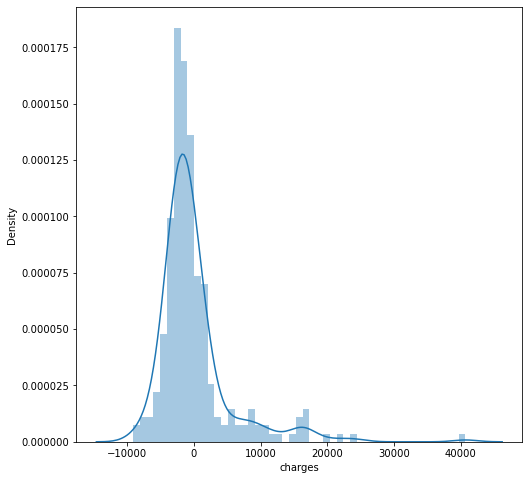

In [226]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-dt_pred)
plt.show()

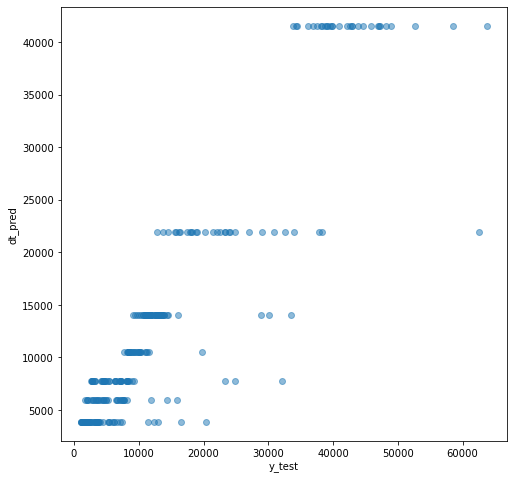

In [227]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,dt_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("dt_pred")
plt.show()

# 3.Random Forest

In [228]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [229]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [230]:
rf_pred = rf.predict(x_test)

In [231]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('r2 score test:',metrics.r2_score(y_test,rf_pred))
print('r2 score train:',rf.score(x_train,y_train))

MAE: 2709.9016502931513
MSE: 23823515.131497454
RMSE: 4880.93383805778
r2 score test: 0.8594640975454607
r2 score train: 0.9755180580831093


In [233]:
r2_score_rf_train = rf.score(x_train,y_train)

r2_score_rf_test = metrics.r2_score(y_test,rf_pred)

rmse_rf = np.sqrt(metrics.mean_squared_error(y_test,rf_pred))

print('R2_score (train) :',r2_score_rf_train)
print('R2_score (test) :',r2_score_rf_test)
print('RMSE :',rmse_rf)
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))

R2_score (train) : 0.9755180580831093
R2_score (test) : 0.8594640975454607
RMSE : 4880.93383805778
MAE: 2709.9016502931513
MSE: 23823515.131497454


In [234]:
#Randomized Search CV for hyperparameter tuning and finding gest parameters
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 4000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

criterian = ['squared_error','mse','absolute_error','poisson']


In [235]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterian
               }


In [236]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 2, verbose=2, random_state=100, n_jobs =-1)

In [237]:
rf_random.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


G:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [               nan -31550198.84623699                nan
                nan                nan                nan
                nan                nan -24013838.88559689
 -23760581.91797803]
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error', 'mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 622, 1044, 1466,
                                                         1888, 2311, 2733, 3155,
                                               

In [238]:
rf_random.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=450, min_samples_leaf=6,
                      min_samples_split=5, n_estimators=1466)

In [239]:
rf = rf_random.best_estimator_

rf.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=450, min_samples_leaf=6,
                      min_samples_split=5, n_estimators=1466)

In [240]:
rf_pred = rf.predict(x_test)

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


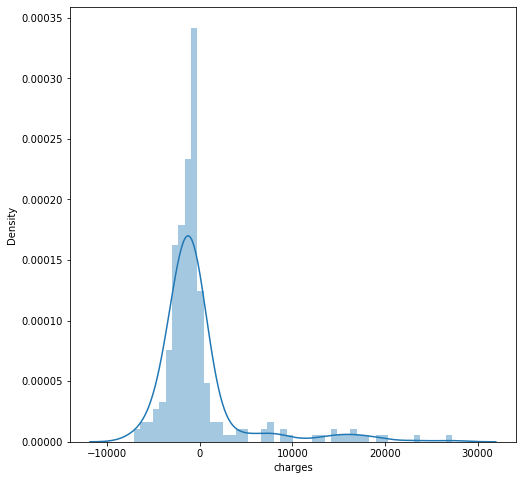

In [241]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-rf_pred)
plt.show()

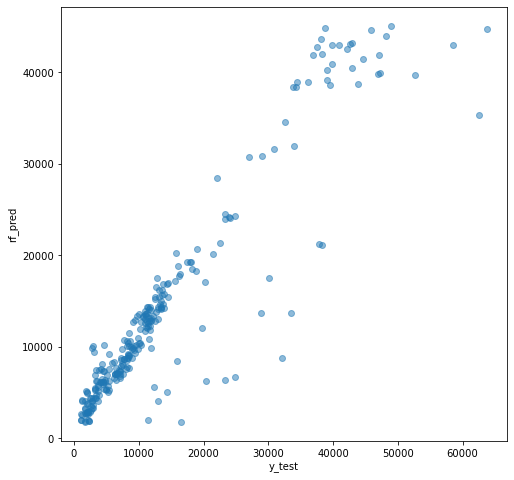

In [242]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,rf_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("rf_pred")
plt.show()

In [243]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('r2 score test:',metrics.r2_score(y_test,rf_pred))
print('r2 score train:',rf.score(x_train,y_train))

MAE: 2756.064847696386
MSE: 23206703.34357547
RMSE: 4817.333634239533
r2 score test: 0.8631026958287848
r2 score train: 0.8715965134034923


In [244]:
r2_score_rf_cv_train = rf.score(x_train,y_train)

r2_score_rf_cv_test = metrics.r2_score(y_test,rf_pred)

rmse_rf_cv = np.sqrt(metrics.mean_squared_error(y_test,rf_pred))

print('R2_score (train) :',r2_score_rf_cv_train)
print('R2_score (test) :',r2_score_rf_cv_test)
print('RMSE :',rmse_rf_cv)
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))

R2_score (train) : 0.8715965134034923
R2_score (test) : 0.8631026958287848
RMSE : 4817.333634239533
MAE: 2756.064847696386
MSE: 23206703.34357547


# Gradient Boosting

In [247]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_predict = GB.predict(x_test)

In [248]:
r2_score_gb_train = gb.score(x_train,y_train)

r2_score_gb_test = metrics.r2_score(y_test,gb_predict)

rmse_gb = np.sqrt(metrics.mean_squared_error(y_test,gb_predict))

print('R2_score (train) :',r2_score_gb_train)
print('R2_score (test) :',r2_score_gb_test)
print('RMSE :',rmse_gb)
print('MAE:', metrics.mean_absolute_error(y_test, gb_predict))
print('MSE:', metrics.mean_squared_error(y_test, gb_predict))

R2_score (train) : 0.9002855662889594
R2_score (test) : 0.8763540176980973
RMSE : 4578.247657938309
MAE: 2478.508982294586
MSE: 20960351.617417615


# Finding Best Estimator with Randomized Search CV

In [249]:
gb=GradientBoostingRegressor()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 4000, num = 10)]
params = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : n_estimators,
                  'max_depth'    : [4,6,8,10],
                  'loss' : ['squared_error', 'lad', 'huber', 'quantile'],
                  'criterion': ['friedman_mse'],
                  'max_features': ['auto', 'sqrt', 'log2']
                 }
gb_random=RandomizedSearchCV(estimator=gb, param_distributions=params,scoring='neg_mean_squared_error', n_iter = 10, cv = 2, verbose=2, random_state=300, n_jobs =-1)
gb_random.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


G:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-28722668.81680416 -27696381.00015134 -22238155.39598989
                nan -30895365.537412   -27239875.30349965
 -30064825.15077664                nan                nan
 -32833131.83574741]
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse'],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04],
                                        'loss': ['squared_error', 'lad',
                                                 'huber', 'quantile'],
                                        'max_depth': [4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 622, 1044, 1466,
                                                         1888, 2311, 2733, 3155,
                                                         3577, 4000],
                                        'subsample': [0.9, 0.5, 0.2, 0.1]},
                   random_state=300, scoring='neg_mean_s

In [250]:
gb_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.02, loss='huber', max_depth=4,
                          max_features='log2', n_estimators=622, subsample=0.5)

In [251]:
gb=gb_random.best_estimator_

In [541]:
GB_predict = GB.predict(x_test)

In [542]:
print('MAE:', metrics.mean_absolute_error(y_test, GB_predict))
print('MSE:', metrics.mean_squared_error(y_test, GB_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GB_predict)))
print('r2 score test:',metrics.r2_score(y_test,GB_predict))
print('r2 score train:',GB.score(x_train,y_train))

MAE: 1856.5108942847357
MSE: 20293412.554156538
RMSE: 4504.82103464239
r2 score test: 0.8802883188547582
r2 score train: 0.8844144111519301
